In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from utils import make_confusion_matrix, make_diff_df, plt_ratio


In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '../data')
SUMISSION_DIR = os.path.join(BASE_DIR, '../submission')

## valid.csv 생성

In [3]:
SEED = 456

data = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
dataset_train, dataset_valid = train_test_split(data, test_size=0.3, stratify=data['target'],random_state=SEED)
dataset_valid.to_csv(os.path.join(DATA_DIR, 'valid.csv'), index=False)  # valid.csv 생성

In [4]:
valid_answer = pd.read_csv(os.path.join(DATA_DIR, 'valid.csv')) # valid.csv
valid_predict = pd.read_csv(os.path.join(SUMISSION_DIR, 'valid_4.csv'))  # valid.csv를 inference한 csv

## Confusion Matrix

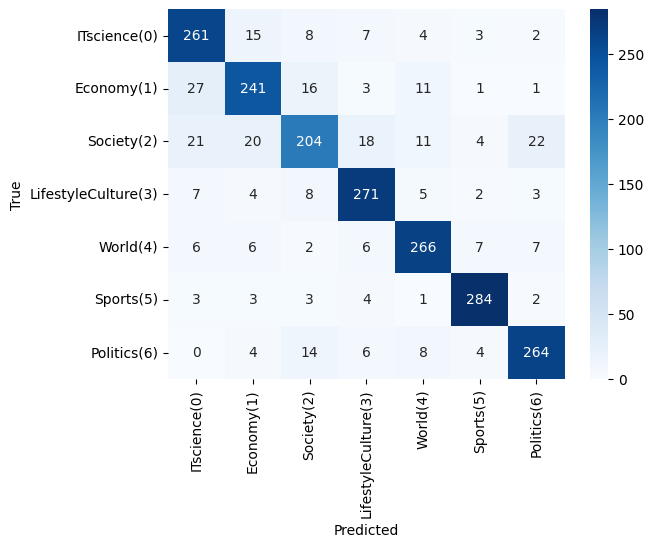

In [5]:
make_confusion_matrix(valid_answer, valid_predict)

## Label별 오답 비율

In [6]:
diff_df = make_diff_df(valid_answer, valid_predict)

/data/ephemeral/level2-nlp-datacentric-nlp-08/code/utils.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df['answer'] = diff_df['answer_label'].apply(lambda x: labels_dict[x])
/data/ephemeral/level2-nlp-datacentric-nlp-08/code/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df['predict'] = diff_df['predict_label'].apply(lambda x: labels_dict[x])


오답 개수:  309


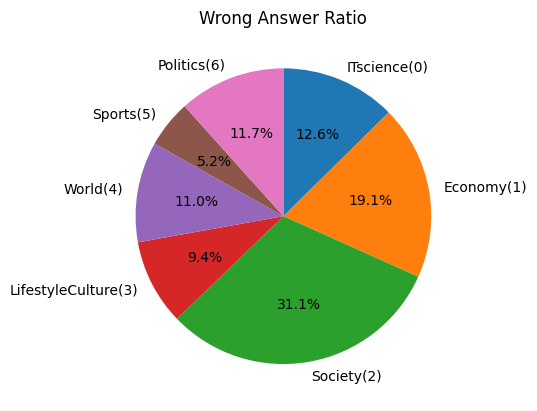

In [7]:
print('오답 개수: ', len(diff_df))
plt_ratio(diff_df)

## 오답 csv 파일로 저장

In [8]:
diff_df.to_csv(os.path.join(DATA_DIR, 'valid_diff.csv'), index=False)